# Lab 1: Machine Learning and Data Acquisition

## Acquire some data

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [74]:
def read_csv(filepath, cols, names):
    df = pd.read_csv("data/" + filepath, usecols=cols, names=names, header=None)
    df = df.drop([0], axis=0) # Remove first row (headers)
    df = df.astype('float64') # Cast data to floats
    
    return df

### Accelerometer

In [75]:
lay_acc_data = read_csv("lay/Accelerometer.csv", [2,3,4], ['ax', 'ay', 'az'])
stand_acc_data = read_csv("stand/Accelerometer.csv", [2,3,4], ['ax', 'ay', 'az'])

In [76]:
lay_acc_data

ax        ay        az
1    -0.206381  9.268898  1.789831
2    -0.206381  9.268898  1.789831
3    -0.628116  8.959925  1.118944
4    -0.223131  9.343075  0.802792
5     0.198305  9.374182  1.044766
...        ...       ...       ...
1274  0.497707  8.696415  1.717748
1275  0.476172  8.880961  1.382453
1276  0.476172  8.880961  1.382453
1277  0.476172  8.880961  1.382453
1278  0.476172  8.880961  1.382453

[1278 rows x 3 columns]

* Plot the accelerometer values using the the plot functions accessible for panda dataframes. Plot all accelerometer values, i.e. all samples for all components of the accelerometer vector.

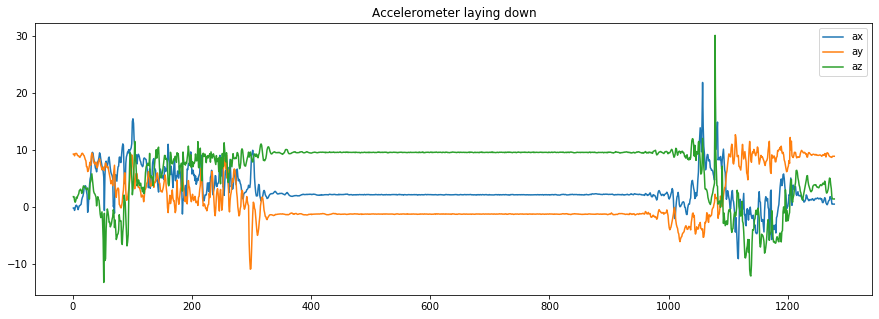

In [77]:
lay_acc_data.plot(kind = "line", y = ["ax", "ay", "az"], title = "Accelerometer laying down", figsize=(15,5))
plt.show()

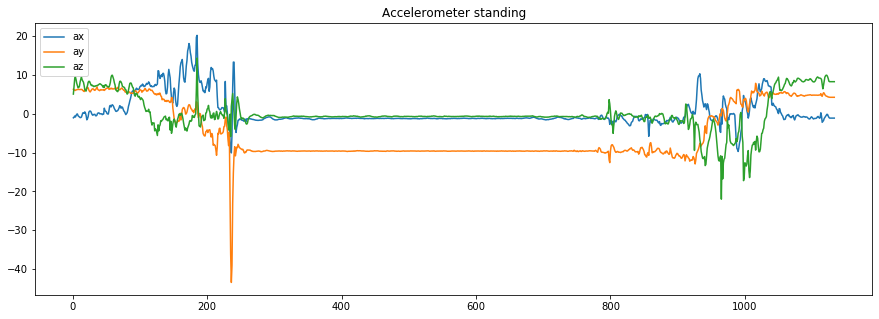

In [78]:
stand_acc_data.plot(kind = "line", y = ["ax", "ay", "az"], title = "Accelerometer standing", figsize=(15,5))
plt.show()

* What are we measuring with the accelerometer?<p>

    G-force. If the accelerometer is reasonably leveled one axis should show about &pm;1g and the other two axes around 0g.

* There is time information both in the csv-file and in the setup in the app. What is the sample time of the accelerometer data? Sample time is the timdifference between two consecutive samples? What is the sampe frequency? The sample frequency is the inverse of the sample time.<p>

    In the app the sample time is set to 10. Unit not shown. The csv-file reveals the unit being milliseconds. If we take a look at the sample time data, we can see that the sample time is not exactly 10ms, but close enough:

In [80]:
lay_acc_time = read_csv("lay/Accelerometer.csv", [1], ['Timestamp'])
lay_acc_time

Timestamp
1           6.0
2          13.0
3          23.0
4          32.0
5          42.0
...         ...
1274    12732.0
1275    12743.0
1276    12753.0
1277    12763.0
1278    12772.0

[1278 rows x 1 columns]

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Frequency (_f_):

In [16]:
1 / (10 * 10**-3)

100.0

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;_f_ = 100 samples per second

* By looking at the plots can you see the difference between the two classes? Explain, and take some notes for future work.<p>
    
    Even though the phone (and hence the accelerometer) is still, the output from the three axes is different in the two plots. The reason is that the phone is positioned differently in regards to earths gravitation laying down compared to standing. Therefore, earth's gravity pulls different axes.

### Magnetometer

In [83]:
lay_mag_data = read_csv("lay/Compass.csv", [2,3,4], ['ax', 'ay', 'az'])
stand_mag_data = read_csv("stand/Compass.csv", [2,3,4], ['ax', 'ay', 'az'])

In [84]:
lay_mag_data

ax         ay         az
1     5.868750 -26.756250 -45.525000
2     1.537500 -28.950000 -45.656250
3    -6.431250 -27.581251 -46.256252
4   -16.031250 -26.662500 -45.825000
5   -24.975000 -28.931252 -40.293750
..         ...        ...        ...
126   7.406250 -18.562500 -52.237503
127   8.287500 -20.025002 -50.118750
128   7.500000 -19.237501 -50.118750
129   8.400001 -21.112501 -48.131252
130   8.400001 -21.112501 -48.131252

[130 rows x 3 columns]

* Plot the magnetometer values using the the plot functions accessible for panda dataframes. Plot all magnetometer values, i.e. all samples for all components of the magnetometer vector.

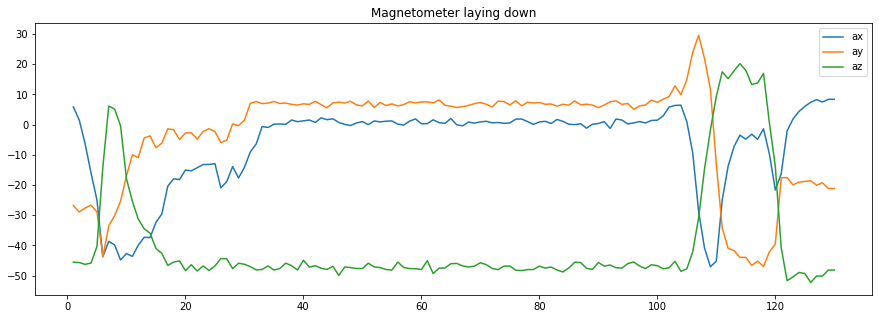

In [85]:
lay_mag_data.plot(kind = "line", y = ["ax", "ay", "az"], title = "Magnetometer laying down", figsize=(15,5))
plt.show()

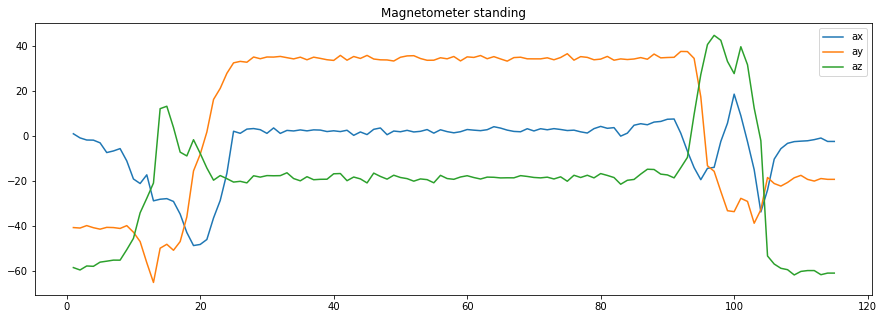

In [86]:
stand_mag_data.plot(kind = "line", y = ["ax", "ay", "az"], title = "Magnetometer standing", figsize=(15,5))
plt.show()

* What are we measuring with the magnetometer?<p>
    
    The force of the magnetic field around the phone.

* There is time information both in the csv-file and in the setup in the app. What is the sample time of the magnetometer data? Sample time is the timdifference between two consecutive samples? What is the sampe frequency? The sample frequency is the inverse of the sample time.<p>

    In the app the sample time is set to 100. Unit not shown. The csv-file reveals the unit being milliseconds. If we take a look at the sample time data, we can see that the sample time is not exactly 100ms, but close enough:

In [87]:
lay_mag_time = read_csv("lay/Compass.csv", [1], ['Timestamp'])
lay_mag_time

Timestamp
1          1.0
2        100.0
3        202.0
4        300.0
5        400.0
..         ...
126    12501.0
127    12600.0
128    12701.0
129    12800.0
130    12900.0

[130 rows x 1 columns]

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Frequency (_f_):

In [88]:
1 / (100 * 10**-3)

10.0

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;_f_ = 10 samples per second

* By looking at the plots can you see the difference between the two classes? Explain, and take some notes for future work.<p>
    
    Assuming earth's magnetic field has the largest contribution to the magnetic field around the phone and all other magnetic field components are negligible, the same reasoning should hold true for the magnetometer as for the accelerometer - the phone is positioned differently in space, thus giving different output in the three axes.

## Vector algebra

### Formulas

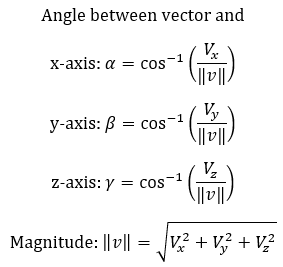

### Functions for calculating the angles

In [208]:
def calc_magnitude(df, i):
    return np.sqrt(df[df.columns[0]].iloc[i]**2 + df[df.columns[1]].iloc[i]**2 + df[df.columns[2]].iloc[i]**2)

In [209]:
def calc_angle(df, axis, i):
    return np.rad2deg(np.arccos(df[axis].iloc[i] / calc_magnitude(df, i)))

In [210]:
def calc_magnitudes(df):
    l = []
    
    for i in range(len(df)):
        l.append(calc_magnitude(df, i))
        
    return pd.DataFrame({'Magnitude': l})

In [202]:
def calc_angles(df, axis):
    l = []
    
    for i in range(len(df)):
        l.append(calc_angle(df, axis, i))
        
    return pd.DataFrame({'Angle in degrees': l})

### Calculations and plots

* Calculate the angle between the acceleration values and the z-direction for all samples, store it in a dataframe and plot it. Do this for both classes.

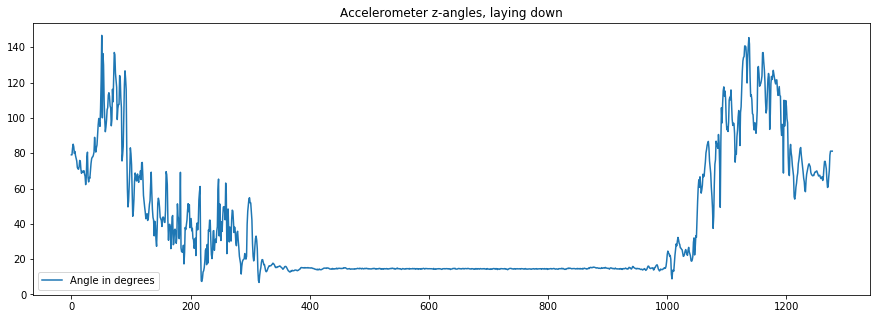

In [207]:
lay_acc_z_angles = calc_angles(lay_acc_data, lay_acc_data.columns[2])
lay_acc_z_angles.plot(kind = "line", title = "Accelerometer z-angles, laying down", figsize=(15,5))
plt.show()

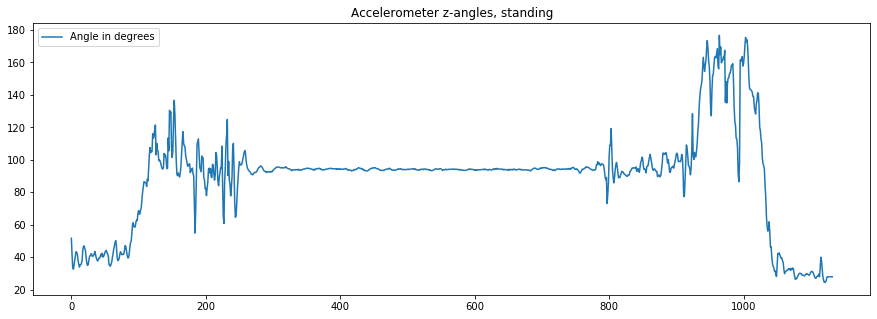

In [204]:
stand_acc_z_angles = calc_angles(stand_acc_data, stand_acc_data.columns[2])
stand_acc_z_angles.plot(kind = "line", title = "Accelerometer z-angles, standing", figsize=(15,5))
plt.show()

* Calculate the angle between the magnetometer values and the y-direction for all samples, store it in a dataframe and plot it. Do this for both classes.

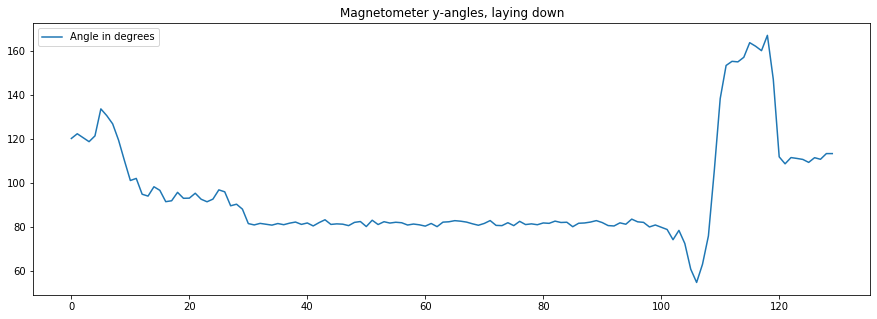

In [205]:
lay_mag_y_angles = calc_angles(lay_mag_data, lay_mag_data.columns[1])
lay_mag_y_angles.plot(kind = "line", title = "Magnetometer y-angles, laying down", figsize=(15,5))
plt.show()

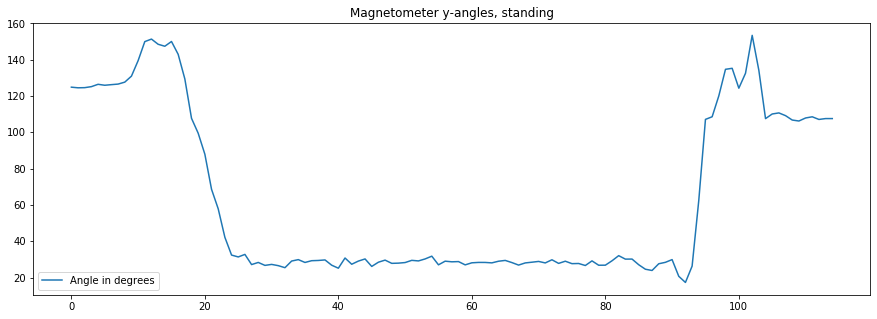

In [206]:
stand_mag_y_angles = calc_angles(stand_mag_data, stand_mag_data.columns[1])
stand_mag_y_angles.plot(kind = "line", title = "Magnetometer y-angles, standing", figsize=(15,5))
plt.show()

* Calculate the magnitude (length,norm) for the accelerometer data for all samples, store and plot.

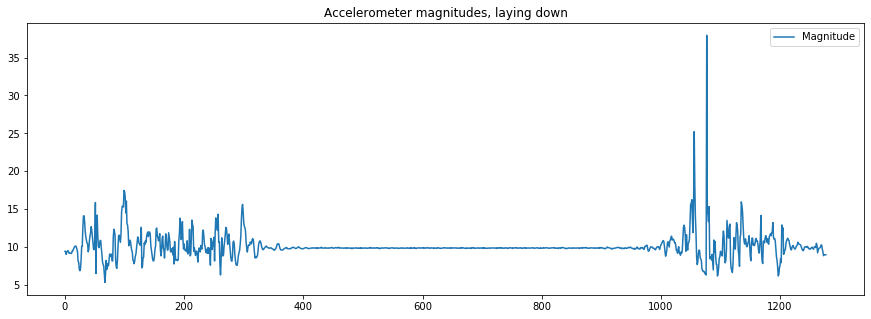

In [213]:
lay_acc_magnitudes = calc_magnitudes(lay_acc_data)
lay_acc_magnitudes.plot(kind = "line", title = "Accelerometer magnitudes, laying down", figsize=(15,5))
plt.show()

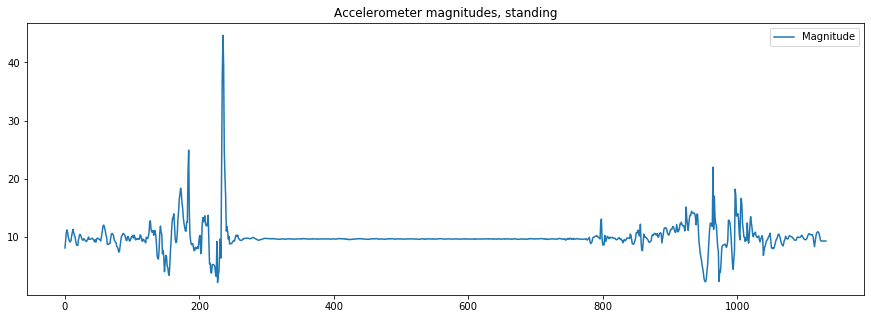

In [215]:
stand_acc_magnitudes = calc_magnitudes(stand_acc_data)
stand_acc_magnitudes.plot(kind = "line", title = "Accelerometer magnitudes, standing", figsize=(15,5))
plt.show()

* Calculate the magnitude (length,norm) for the magnetometer data for all samples, store and plot.

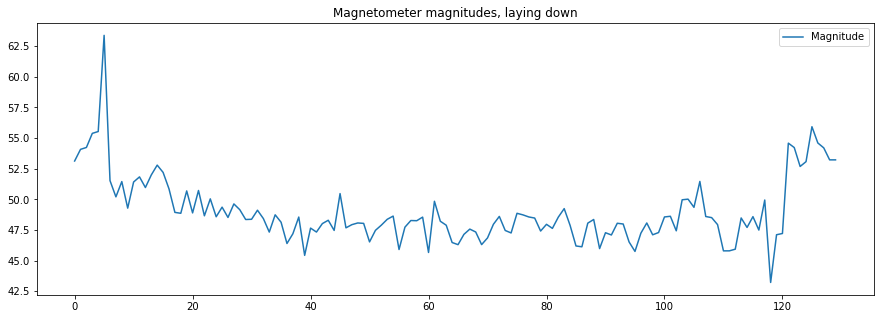

In [216]:
lay_mag_magnitudes = calc_magnitudes(lay_mag_data)
lay_mag_magnitudes.plot(kind = "line", title = "Magnetometer magnitudes, laying down", figsize=(15,5))
plt.show()

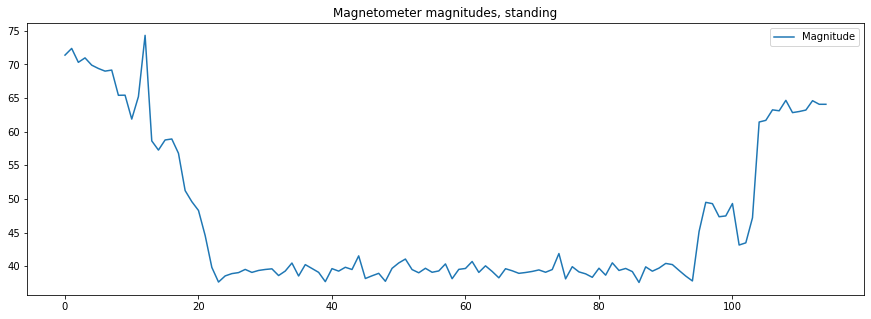

In [217]:
stand_mag_magnitudes = calc_magnitudes(stand_mag_data)
stand_mag_magnitudes.plot(kind = "line", title = "Magnetometer magnitudes, standing", figsize=(15,5))
plt.show()